In [1]:
import pandas as pd
import numpy as np
import src.generation.gamma as ga
import src.generation.multivariate_normal as mn
from src.generation.base.generator import BaseGenerator

import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
# params
N = 1000
F = N
size=100

In [3]:
def gamma_wrapper(cor: float) -> BaseGenerator:
    return ga.Generator(F, size, cor, (2,4))

def mn_wrapper(cor: float) -> BaseGenerator:
    return mn.Generator(F, size, cor, (4,6), (1,1))

In [4]:
def calc(wrapper, cor: float):
    generator = wrapper(cor)
    vectors = generator.generate_cloud_load_vectors()
    cm = np.corrcoef(vectors)
    # return cm[cm != 1]
    return np.mean(cm[cm != 1]), np.sum(vectors)

calc(gamma_wrapper, 0.5)

(0.5369157209043343, 605375.2654539582)

In [5]:
cor_rng = np.arange(0, 1.01, 0.05)

In [6]:
%%time
repeats = 100
ga_res = []

for cor in cor_rng:
    for _ in range(repeats):
        r_ga, l_ga= calc(gamma_wrapper, cor)

        ga_res.append((cor, r_ga, l_ga))

CPU times: user 14min 13s, sys: 13min 13s, total: 27min 27s
Wall time: 4min 7s


In [7]:
%%time
repeats = 20
mn_res = []

for cor in cor_rng:
    for _ in range(repeats):
        r_mn, l_mn = calc(mn_wrapper, cor)

        mn_res.append((cor, r_mn, l_mn))

CPU times: user 30min 18s, sys: 17min 32s, total: 47min 51s
Wall time: 7min 17s


In [8]:
df_ga = pd.DataFrame(ga_res, columns=['expected', 'actual', 'load'])
df_mn = pd.DataFrame(mn_res, columns=['expected', 'actual', 'load'])

In [9]:
grped = df_ga.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['mean', 'count', 'std']})
mnped = df_mn.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['mean', 'count', 'std']})

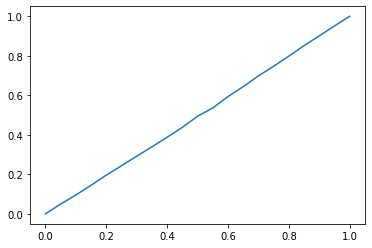

In [10]:
plt.plot(grped.index, grped.actual['mean'])
plt.show()

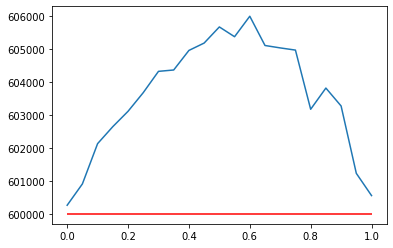

In [11]:
line = gamma_wrapper(0).get_estimated_cloud_load()
plt.plot(grped.index, grped.load['mean'])
plt.hlines(line, 0, 1, colors="red")
plt.show()

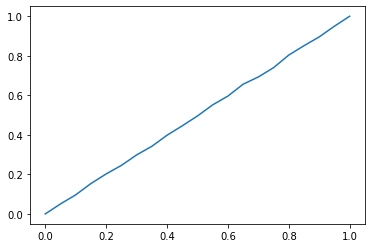

In [12]:
plt.plot(mnped.index, mnped.actual['mean'])
plt.show()

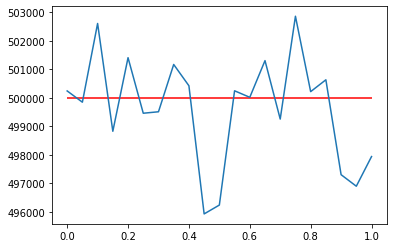

In [13]:
line = mn_wrapper(0).get_estimated_cloud_load()
plt.plot(mnped.index, mnped.load['mean'])
plt.hlines(line, 0, 1, colors="red")
plt.show()

In [14]:
grped

actual                           load                   
              mean count       std           mean count          std
expected                                                            
0.00      0.000253   100  0.000139  600262.992279   100  3564.216156
0.05      0.049729   100  0.007293  600909.801060   100  3729.400348
0.10      0.095431   100  0.013530  602132.306238   100  3865.897898
0.15      0.144798   100  0.015068  602648.056830   100  4051.657936
0.20      0.195848   100  0.018528  603113.225775   100  4364.920069
0.25      0.243638   100  0.025745  603679.601329   100  3642.204074
0.30      0.291763   100  0.024904  604325.096865   100  4493.737420
0.35      0.339129   100  0.026912  604366.470358   100  4775.427628
0.40      0.387663   100  0.030578  604959.885100   100  3825.355214
0.45      0.437779   100  0.034682  605183.313738   100  4494.778771
0.50      0.493935   100  0.030967  605672.421786   100  4716.946767
0.55      0.535762   100  0.028749  605375.779330   100  3986.108851
0.60      0.593379   100  0.032126  605997.046245   100  4431.881239
0.65      0.643455   100  0.026093  605109.694183   100  4305.413179
0.70      0.698185   100  0.021288  605036.411790   100  4539.498978
0.75      0.746785   100  0.017156  604970.024475   100  4031.375942
0.80      0.797837   100  0.014339  603175.006732   100  4353.762284
0.85      0.851102   100  0.008965  603817.943113   100  3948.452326
0.90      0.900451   100  0.005376  603274.806489   100  3640.851249
0.95      0.950732   100  0.002187  601230.923344   100  4228.919134
1.00      0.999947   100  0.000082  600556.067214   100  3767.019027

In [15]:
mnped

actual                               load                    
              mean count           std           mean count           std
expected                                                                 
0.00      0.000246    20  1.407840e-04  500238.564203    20   1765.322269
0.05      0.050909    20  8.842846e-03  499844.046080    20   2879.306805
0.10      0.096830    20  1.117859e-02  502604.253812    20   2833.145784
0.15      0.153938    20  1.565837e-02  498824.163792    20   3990.134575
0.20      0.202597    20  2.074371e-02  501404.505411    20   4488.347396
0.25      0.245548    20  2.868763e-02  499456.755768    20   6022.353378
0.30      0.298569    20  2.505025e-02  499508.084215    20   6452.978006
0.35      0.342111    20  2.967165e-02  501166.390828    20   5638.746073
0.40      0.398267    20  3.543735e-02  500420.003416    20   7182.245977
0.45      0.445858    20  3.352110e-02  495925.990418    20   5962.803048
0.50      0.495639    20  2.379040e-02  496236.711973    20   7204.363666
0.55      0.551842    20  3.665923e-02  500243.626143    20   6683.568164
0.60      0.596213    20  3.827412e-02  500015.006159    20   7384.115237
0.65      0.656293    20  2.809890e-02  501301.988442    20   6880.354086
0.70      0.692956    20  3.573858e-02  499252.170423    20   9102.951904
0.75      0.739889    20  2.536410e-02  502857.960361    20  10921.954324
0.80      0.803662    20  2.273080e-02  500214.247496    20   7483.101808
0.85      0.850982    20  1.684544e-02  500629.482703    20   8749.117988
0.90      0.895509    20  1.449569e-02  497301.838038    20   8992.778024
0.95      0.949729    20  6.515799e-03  496897.143241    20   7809.129736
1.00      1.000000    20  3.951120e-14  497937.072224    20  11510.828786